In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

In [2]:
df_sam=pd.read_csv(r"C:\Users\ragha\Downloads\samsungMobilesData.csv")
df_sam

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,https://rukminim2.flixcart.com/image/312/312/k...,32,other_types,3500,128,6,not mentioned,9
403,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,25,other_types,4000,64,4,not mentioned,12
404,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,13,other_types,3300,32,2,Snapdragon425P,8
405,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,https://rukminim2.flixcart.com/image/312/312/k...,13,other_types,4000,32,3,MediaTek,9


In [3]:
labels=['SAMSUNG','APPLE','MI','TRANSSION','VIVO','OTHERS']
explode=[0.2,0,0,0,0,0]
values=[15.6,23.2,12.9,8.2,8.2,32.0]
df_c=pd.DataFrame({
    'year':[2023,2024,2025]*2,
    'units':[231,232,247.8,227,224,241.2],
    'Company':['Apple']*3+['Samsung']*3
})

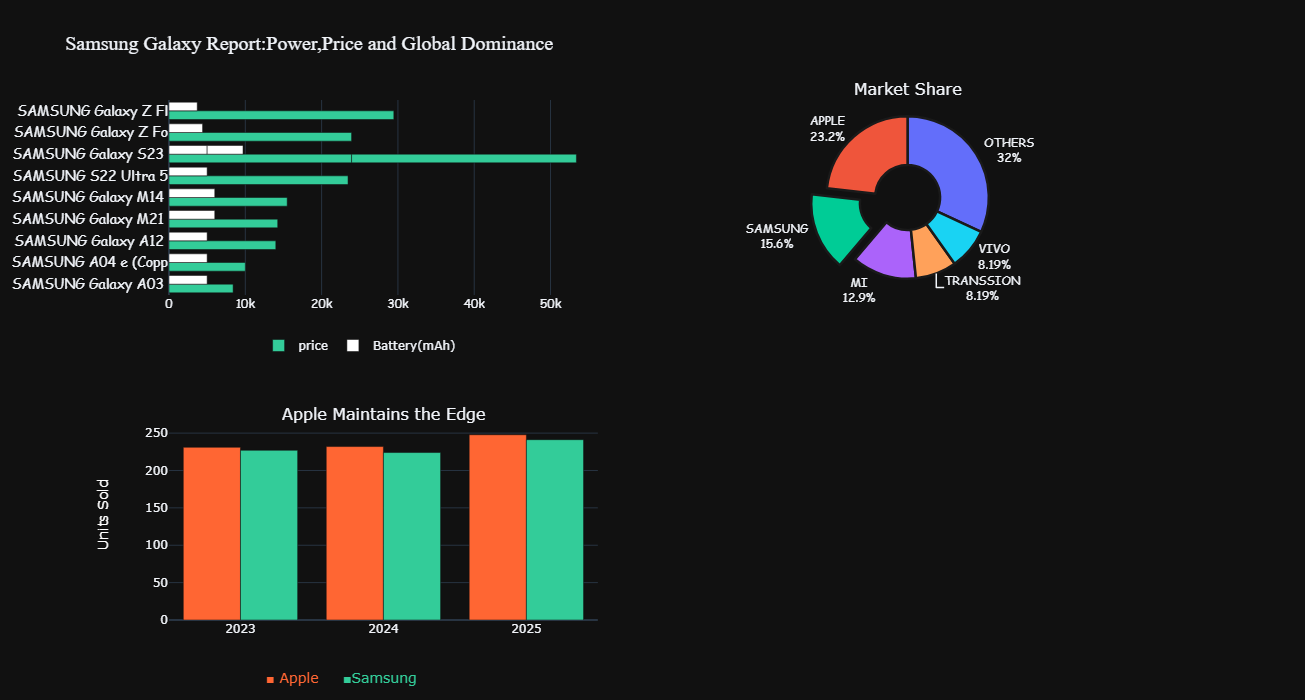

In [4]:
fig=make_subplots(rows=2,cols=2,subplot_titles=['','Market Share','Apple Maintains the Edge',''],
                 specs=[[{'type':'xy'},{'type':'domain'}],
                       [{'type':'xy'},{'type':'xy'}]])
df_samp=df_sam.sample(n=10).sort_values(by='price',ascending=True)
df_samp['name']=df_samp['name'].str[:19]
fig.add_traces(go.Bar(y=df_samp['name'],
                      x=df_samp['price'],
                      name='price',
                      marker_color='#33CC99',
                      orientation='h'),
               rows=1,cols=1)
fig.add_traces(go.Bar(y=df_samp['name'],
                      x=df_samp['battery'],
                      name='Battery(mAh)',
                  orientation='h',marker_color='WHITE'),rows=1,cols=1)
fig.add_traces(go.Pie(labels=labels,values=values,
                      hole=.4,textinfo='label+percent',
                      textposition='outside',
                      outsidetextfont=dict(family='Comic Sans MS'),
                      pull=explode,
                      marker_line=dict(color='#1a1a1a', width=2.5),
                      insidetextorientation='auto',
                      showlegend=False),
               rows=1,cols=2)
fig.update_layout(height=700,width=1000,title_text='Samsung Galaxy Report:Power,Price and Global Dominance',
                  title_font=dict(family='serif',size=20),template='plotly_dark')
fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=0.5,
    xanchor='center',
    x=0.2
))
fig.add_traces(go.Bar(x=df_c[df_c['Company']=='Apple']['year'],
                      y=df_c[df_c['Company']=='Apple']['units'],
                     name='Apple',showlegend=False,marker_color='#FF6633'),rows=2,cols=1)
fig.add_traces(go.Bar(x=df_c[df_c['Company']=='Samsung']['year'],
                      y=df_c[df_c['Company']=='Samsung']['units'],
                      name='Samsung',showlegend=False,marker_color='#33CC99'),rows=2,cols=1)
fig.add_annotation(
    dict(x=0.1,y=-0.13,xref='paper',yref='paper',
        text='■ Apple',
        showarrow=False,
        font=dict(color='#FF6633',
                 size=14))
)
fig.update_layout(yaxis=dict(tickfont=dict(family='Comic Sans MS',size=14)),
                 xaxis=dict(tickfont=dict(family='Comic Sans MS')))
fig.add_annotation(dict
                  (x=0.18,y=-0.13,xref='paper',yref='paper',text='■Samsung',
                  showarrow=False,
                  font=dict(color='#33CC99',size=14)))
fig.add_annotation(dict
                  (x=-0.08,y=0.13,xref='paper',yref='paper',text='Units Sold',
                  showarrow=False,textangle=-90,
                  font=dict(color='white',size=14)))
fig.show()